<a href="https://colab.research.google.com/github/Mashael0x/The-game-of-life/blob/main/Aiartathon0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!git clone https://github.com/titu1994/Neural-Style-Transfer.git


Cloning into 'Neural-Style-Transfer'...
remote: Enumerating objects: 1411, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 1411 (delta 5), reused 6 (delta 1), pack-reused 1393
Receiving objects: 100% (1411/1411), 68.18 MiB | 36.59 MiB/s, done.
Resolving deltas: 100% (824/824), done.


In [ ]:
dir_path = "Neural-Style-Transfer"

In [ ]:
NETWORK = 'INetwork' + '.py'

In [ ]:
# List all the arguments that can be supplied to Network.py
!python {dir_path}/{NETWORK} -h

Using TensorFlow backend.
usage: INetwork.py [-h] [--style_masks STYLE_MASKS [STYLE_MASKS ...]]
                   [--content_mask CONTENT_MASK] [--color_mask COLOR_MASK]
                   [--image_size IMG_SIZE] [--content_weight CONTENT_WEIGHT]
                   [--style_weight STYLE_WEIGHT [STYLE_WEIGHT ...]]
                   [--style_scale STYLE_SCALE]
                   [--total_variation_weight TV_WEIGHT] [--num_iter NUM_ITER]
                   [--model MODEL] [--content_loss_type CONTENT_LOSS_TYPE]
                   [--rescale_image RESCALE_IMAGE]
                   [--rescale_method RESCALE_METHOD]
                   [--maintain_aspect_ratio MAINTAIN_ASPECT_RATIO]
                   [--content_layer CONTENT_LAYER] [--init_image INIT_IMAGE]
                   [--pool_type POOL] [--preserve_color COLOR]
                   [--min_improvement MIN_IMPROVEMENT]
                   base ref [ref ...] res_prefix

Neural style transfer with Keras.

positional arguments:
  base     

In [ ]:
# Image size
IMAGE_SIZE = 500

# Loss Weights
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Training arguments
NUM_ITERATIONS = 100
MODEL = 'vgg19'
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0

In [ ]:
from google.colab import files

content_img = files.upload()

Saving base.jpeg to base.jpeg


In [ ]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : base.jpeg


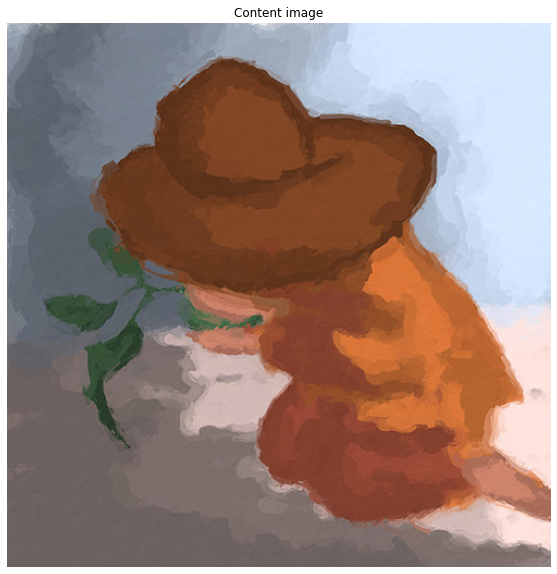

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

In [ ]:
style_img = files.upload()

Saving style.jpg to style.jpg


In [ ]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp

print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : style.jpg


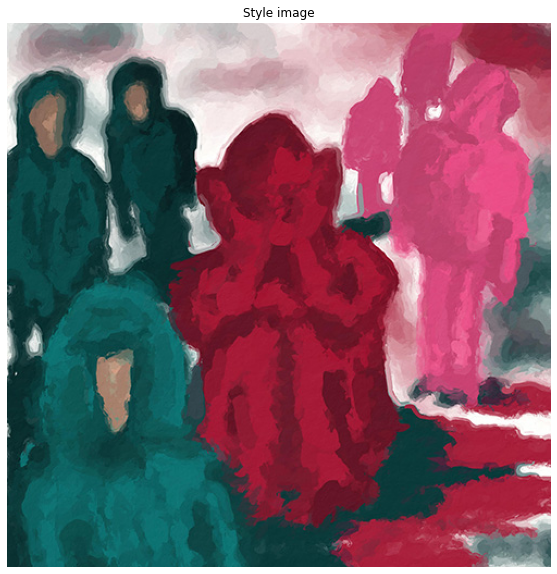

In [ ]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

In [ ]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [ ]:
!python {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

80142336/80134624 [==============================] - 1s 0us/step
2021-10-21 13:05:50.908425: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-21 13:05:50.968175: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-21 13:05:50.968248: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (60214f23f809): /proc/driver/nvidia/version does not exist
2021-10-21 13:05:50.980117: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200150000 Hz
2021-10-21 13:05:50.980482: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ac326cec40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-21 13

Time execution 5h44m12s

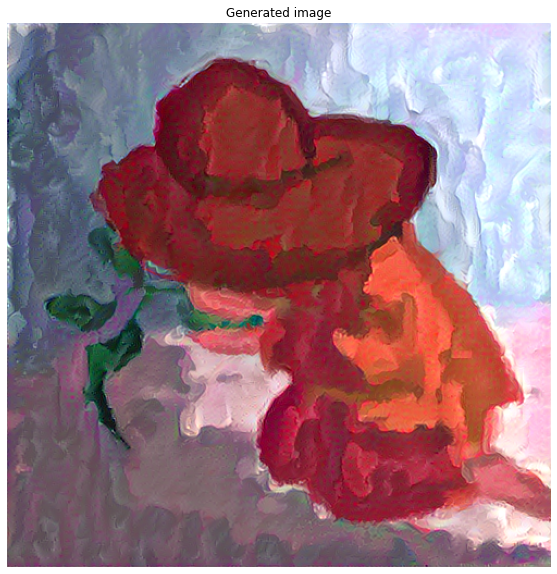

In [ ]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread('/content/generated/gen_at_iteration_32.png')
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)